In [1]:
import pandas as pd
import barley_break
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

Создание данных. Тут генерируется 1000 случаев и рассматривается выбор элемента для дальнейшего спуска, это можэет быть первый попавший в список, может быть последний попавший в список и случайный элемент. Пятнашки размером 5 на 5.

In [2]:
# def gen_barley_break(val):
#     h, w = val
#     return np.matrix(np.matrix(list(range(1, h * w)) + [0]).reshape(h, w))
# 
# 
# def get_data(first):
#     barley_break.shuffle(first)
#     r, steps, b = barley_break.get_tree(first)
#     return len(b.directions) - 1, steps
# 
# 
# pool = Pool(24)
# barley_breaks = list(pool.map(gen_barley_break, [(4, 4) for i in range(100)]))
# data1 = list(pool.map(get_data, barley_breaks))

Рассмотрим полученные данные (sol от слова solution, то есть решение):

In [3]:
df1 = pd.read_csv("pop0-1000.csv", index_col=0)
df2 = pd.read_csv('popLast-1000.csv', index_col=0)
df3 = pd.read_csv("popRandom-1000.csv", index_col=0)
df_all = pd.concat([df1["0"], df2["0"], df3["0"], df1["1"], df2["1"], df3["1"], ], axis=1)
df_all.columns = ["First sol", "Last sol", "Random sol", "First steps", "Last steps", "Random steps", ]
df_all.describe()

,First sol,Last sol,Random sol,First steps,Last steps,Random steps
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,240.972000,241.312000,238.372000,25236.115000,25556.077000,23895.218000
std,66.297712,68.265033,63.287241,36084.229046,24041.492355,22565.638469
min,64.000000,58.000000,60.000000,645.000000,1054.000000,769.000000
25%,192.000000,194.000000,194.000000,8935.500000,8957.250000,9266.250000
50%,234.000000,232.000000,232.000000,17536.000000,18068.500000,17333.000000
75%,282.000000,290.000000,276.000000,31214.250000,31373.000000,28404.250000
max,458.000000,500.000000,454.000000,922150.000000,234642.000000,217952.000000


В первых 3 столбцах показано количество шагов необходимое для того, чтобы решить пятнашки. В следующих 3 столбцах представлено количество шагов необходимое для того, чтобы получить решение. Далее рассмотрим кпд и ошибку каждого типа спуска по дереву.

In [4]:
df_kpd = pd.concat([df_all['First sol'] / df_all['First steps'],
                    df_all['Last sol'] / df_all['Last steps'],
                    df_all['Random sol'] / df_all['Random steps'],
                    df_all['First steps'] - df_all['First sol'],
                    df_all['Last steps'] - df_all['Last sol'],
                    df_all['Random steps'] - df_all['Random sol'], ], axis=1)
df_kpd.columns = ["First kpd", "Last kpd", "Random kpd", "First error", "Last error", "Random error", ]
df_kpd.describe()

,First kpd,Last kpd,Random kpd,First error,Last error,Random error
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.017817,0.017640,0.017509,24995.143000,25314.765000,23656.846000
std,0.014195,0.013939,0.013223,36053.138862,23993.055008,22523.683373
min,0.000440,0.001483,0.001425,581.000000,930.000000,673.000000
25%,0.008074,0.008115,0.008581,8761.500000,8777.750000,9088.750000
50%,0.013871,0.013328,0.013663,17324.000000,17809.500000,17057.500000
75%,0.023023,0.022724,0.022450,30965.750000,31078.500000,28081.250000
max,0.118624,0.117647,0.124837,921744.000000,234294.000000,217596.000000


Видно, что в среднем кпд и ошибка различаются не сильно. 

Все 1000 случаев: сравнение количества шагов решения и просмотренных решений по разным выборкам

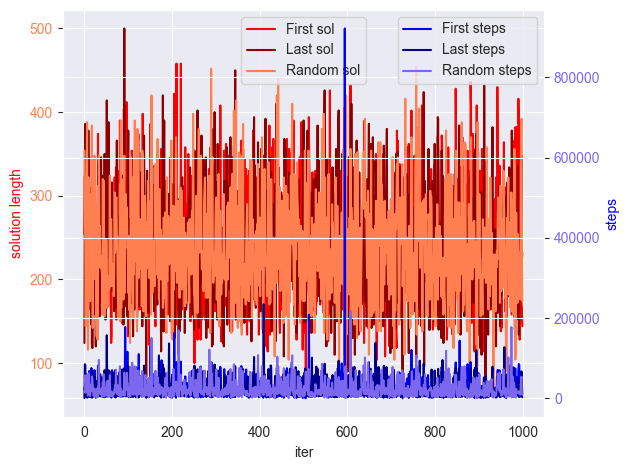

<Figure size 20000x20000 with 0 Axes>

In [5]:
fig, ax1 = plt.subplots()
plt.figure(figsize=(200, 200))

ax1.set_xlabel('iter')
color = 'red'
ax1.set_ylabel('solution length', color=color)
ax1.plot(df1.index, df1["0"], color=color, label="First sol")
ax1.tick_params(axis='y', labelcolor=color)
color = 'darkred'
ax1.plot(df2.index, df2["0"], color=color, label="Last sol")
ax1.tick_params(axis='y', labelcolor=color)
color = 'coral'
ax1.plot(df3.index, df3["0"], color=color, label="Random sol")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('steps', color=color)  # we already handled the x-label with ax1
ax2.plot(df1.index, df1["1"], color=color, label="First steps")
ax2.tick_params(axis='y', labelcolor=color)
color = 'darkblue'
ax2.plot(df2.index, df2["1"], color=color, label="Last steps")
ax2.tick_params(axis='y', labelcolor=color)
color = 'mediumslateblue'
ax2.plot(df3.index, df3["1"], color=color, label="Random steps")
ax2.tick_params(axis='y', labelcolor=color)

ax1.legend()
ax2.legend()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Распределение количества шагов в решении: 

C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option 

<Figure size 20000x20000 with 0 Axes>

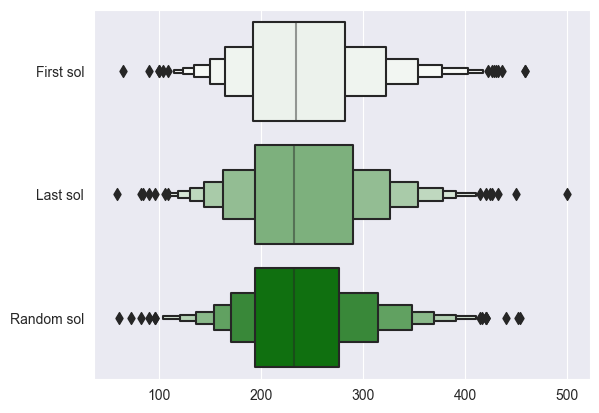

<Figure size 20000x20000 with 0 Axes>

In [6]:
sns.boxenplot(data=df_all[df_all.columns[0:3]], palette="light:g", orient="h")
plt.figure(figsize=(200, 200))

Распределение количества проверенных шагов:

C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option 

<Figure size 20000x20000 with 0 Axes>

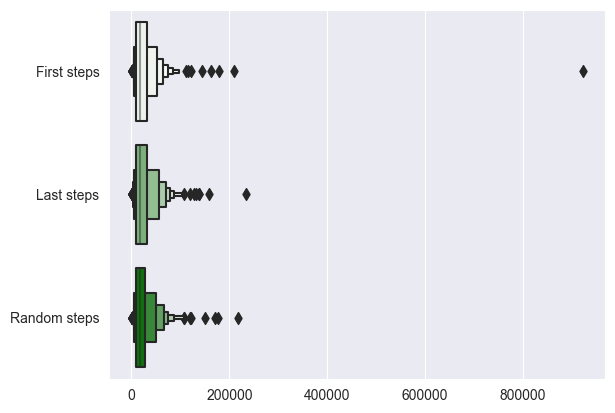

<Figure size 20000x20000 with 0 Axes>

In [7]:
sns.boxenplot(data=df_all[df_all.columns[3:6]], palette="light:g", orient="h")
plt.figure(figsize=(200, 200))

Выкинем выбросы:

In [8]:
lq = df_all.quantile(.995)
lq

First sol          428.010
Last sol           420.020
Random sol         420.000
First steps     121033.800
Last steps      128012.115
Random steps    118860.150
Name: 0.995, dtype: float64

In [9]:
fq = df_all.quantile(.005)
fq

First sol        107.980
Last sol         105.950
Random sol        96.000
First steps     1585.970
Last steps      1757.900
Random steps    1867.735
Name: 0.005, dtype: float64

In [10]:
df_all_clean = df_all[~np.any(~(df_all < lq), axis=1)]
df_all_clean = df_all_clean[~np.any(~(df_all_clean > fq), axis=1)]
df_all_clean.describe()

,First sol,Last sol,Random sol,First steps,Last steps,Random steps
count,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,240.484144,241.145877,238.234672,23672.274841,24764.863636,22954.593023
std,63.565175,65.189134,60.180679,19794.638385,21683.382198,19546.299857
min,108.000000,108.000000,104.000000,1586.000000,1758.000000,1869.000000
25%,192.500000,194.000000,194.000000,9004.000000,9048.000000,9442.250000
50%,234.000000,232.000000,232.000000,17483.000000,17927.000000,17197.000000
75%,282.000000,288.000000,274.000000,31035.250000,30826.250000,27474.250000
max,428.000000,420.000000,416.000000,120918.000000,127995.000000,118846.000000


Распределение количества шагов в решении (без выбросов): 

C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option 

<Figure size 20000x20000 with 0 Axes>

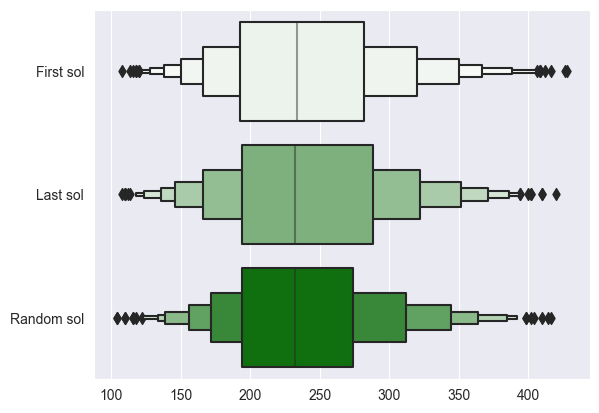

<Figure size 20000x20000 with 0 Axes>

In [11]:
sns.boxenplot(data=df_all_clean[df_all_clean.columns[0:3]], palette="light:g", orient="h")
plt.figure(figsize=(200, 200))

Распределение количества проверенных шагов (без выбросов):

C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kolya\PycharmProjects\intelligent-systems\venv\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option 

<Figure size 20000x20000 with 0 Axes>

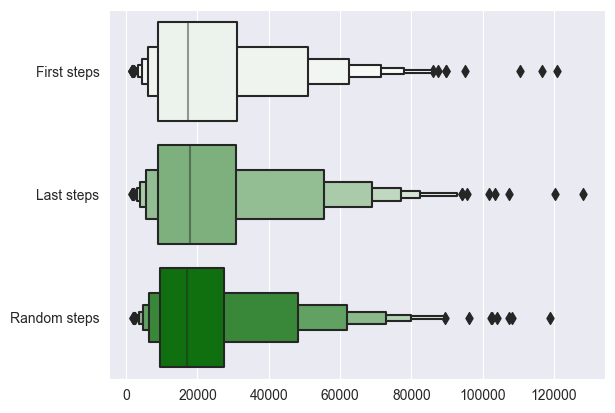

<Figure size 20000x20000 with 0 Axes>

In [12]:
sns.boxenplot(data=df_all_clean[df_all_clean.columns[3:6]], palette="light:g", orient="h")
plt.figure(figsize=(200, 200))

Исходя из рассмотренных случаев можно сделать вывод, что различия между выбором типа спуска не столько принципиален, различия не очень большие. Но видно, что наилучшие результаты показывает случайный выбор, но данный способ выгоден только при большой выборке, так как он очень нестабилен. 

Если брать первый, то прохождение по дереву меньше, чем если брать последний, но разница не столько велика, как я ожидал.